# Linear Regression Model


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("LRModel.csv")
print(data)

     Study Hours  Scores (%)
0            4.0   22.973306
1            0.0    5.812080
2            1.0    8.262759
3            3.0         NaN
4            3.0   17.993370
..           ...         ...
105          2.0         NaN
106          2.0   11.394886
107          9.0   44.420162
108          9.0   43.676481
109          9.0   40.149933

[110 rows x 2 columns]


In [2]:
data.rename(columns={"Scores (%)" : "results" , "Study Hours" : "study_hours"},inplace=True)
data.head()

,study_hours,results
0,4.0,22.973306
1,0.0,5.812080
2,1.0,8.262759
3,3.0,NaN
4,3.0,17.993370


In [3]:
#shape of dataset
data.shape

(110, 2)

In [4]:
#identifying null values in dataset
data.isnull().sum()

study_hours    7
results        5
dtype: int64

In [5]:
#finding mean for filling null values
studyhours=data['study_hours']
sh=np.mean(studyhours)
sh

5.135922330097087

In [6]:
#finding no of null values
data['study_hours'].isnull().sum()

7

In [7]:
#Filling null values using mean
data['study_hours']=data['study_hours'].fillna(sh)

In [8]:
#finding null values after filling
data['study_hours'].isnull().sum()

0

In [9]:
#finding  no of null values
data['results'].isnull().sum()

5

In [10]:
#finding mean for filling null values
results=data['results']
results=np.mean(results)
results

28.595344343904248

In [11]:
#Filling null values using mean
data['results']=data['results'].fillna(results)

In [12]:
#finding null values after filling
data['results'].isnull().sum()

0

In [13]:
#identifying redundant rows in data
duplicates=data.duplicated().sum()
duplicates

10

In [14]:
#dropping rows
data=data.drop_duplicates()

Text(0, 0.5, 'Result Percentage')

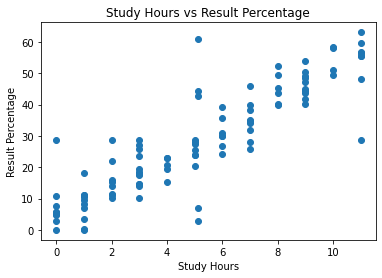

In [15]:
#To identify relationship between the attributes
plt.scatter(data['study_hours'],data['results'])
plt.title('Study Hours vs Result Percentage')
plt.xlabel('Study Hours')
plt.ylabel('Result Percentage')

In [16]:
data.corr()

,study_hours,results
study_hours,1.000000,0.886829
results,0.886829,1.000000


In [17]:
#importing required libraries for linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.metrics import r2_score

In [18]:
#default test size for train test split
x=data['study_hours']
y=data['results']
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75,)
(25,)
(75,)
(25,)


In [19]:
#mentioned test size for train test split
x=data[['study_hours']]
y=data['results']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 1)
(20, 1)
(80,)
(20,)


In [20]:
#Train model
regModel = LinearRegression()
regModel.fit(x_train,y_train)

LinearRegression()

In [21]:
#Intercept
print(regModel.intercept_)

6.7084799051851824


In [22]:
#Coeff
print(regModel.coef_)

[4.2739007]


In [23]:
#predict
y_pred=regModel.predict(x_test)

In [24]:
df = pd.DataFrame({"actual":y_test,"predicted":y_pred})
df.head()

,actual,predicted
59,15.306684,15.256281
13,39.767052,36.625785
40,53.791837,45.173586
69,52.278652,40.899686
17,2.941035,6.708480


In [25]:
#Metrics
print("MAE :",metrics.mean_absolute_error(y_test,y_pred))
print("MSE :",metrics.mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2 score :",metrics.r2_score(y_test,y_pred))

MAE : 5.92722706999915
MSE : 72.42928650071498
RMSE : 8.510539730282385
r2 score : 0.7836396631168319


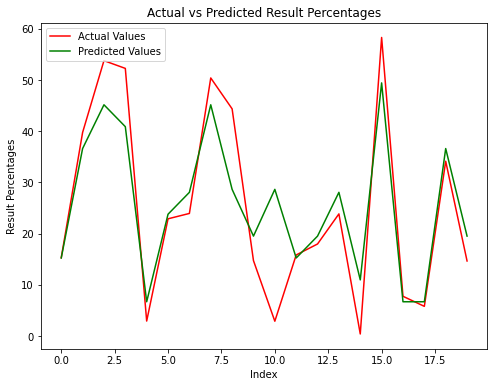

In [26]:
# To plot the best fit line
ind=[i for i in range(len(y_test))]
best_fit_line = x_test * regModel.coef_ + regModel.intercept_
plt.figure(figsize=(8,6))
plt.plot(ind, y_test, color='red', label='Actual Values')
plt.plot(ind, y_pred, color='green', label='Predicted Values')
plt.xlabel('Index')
plt.ylabel('Result Percentages')
plt.title('Actual vs Predicted Result Percentages')
plt.legend()
plt.show()

In [27]:
#prediction by giving numeric data
regModel.predict([[20]])

array([92.18649391])

# Multiple Linear Regression

In [28]:
# Importing the Boston Housing dataset
import seaborn as sns
from sklearn.datasets import load_boston
boston = load_boston()

In [29]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [30]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 

In [33]:
#Check the shape of dataframe
data.shape

(506, 14)

In [34]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [35]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [36]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [37]:
df.duplicated().sum()

0

In [38]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [39]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

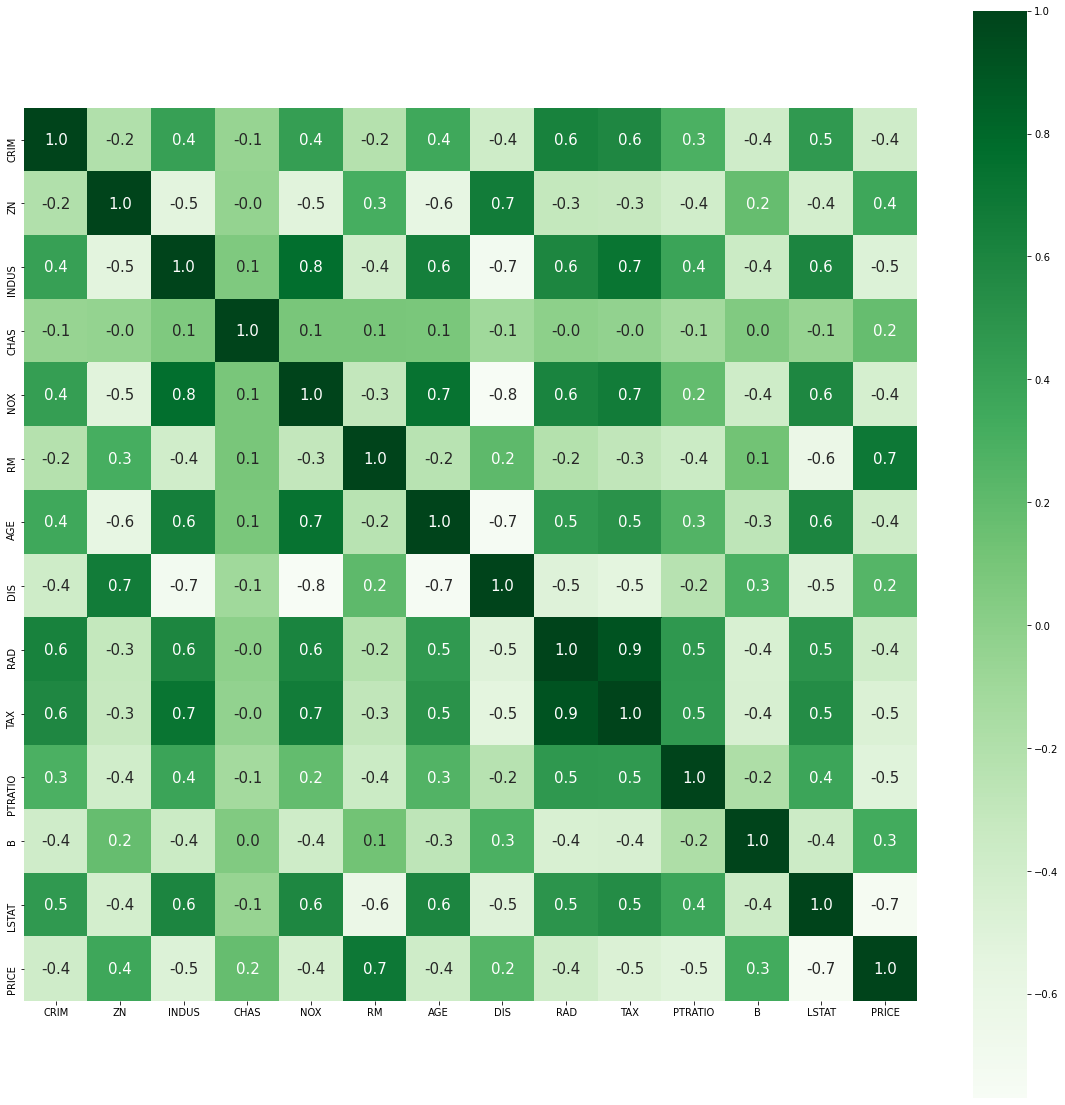

In [40]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1],data['PRICE'], test_size = 0.3, random_state = 4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [42]:
# Create a Linear regressor
lm = LinearRegression()
# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
# Value of y intercept
lm.intercept_

36.35704137659499

In [44]:
#Value of Coeff
lm.coef_

array([-1.22569795e-01,  5.56776996e-02, -8.83428230e-03,  4.69344849e+00,
       -1.44357828e+01,  3.28008033e+00, -3.44778157e-03, -1.55214419e+00,
        3.26249618e-01, -1.40665500e-02, -8.03274915e-01,  9.35368715e-03,
       -5.23477529e-01])

In [45]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [46]:
min_length = min(len(y_test), len(y_pred))
y_test2 = y_test[:min_length]
y_pred2 = y_pred[:min_length]
df = pd.DataFrame({"actual": y_test2, "predicted": y_pred2})
df.head()

,actual,predicted
8,16.5,24.522480
289,24.8,15.197510
68,17.4,25.577206
211,19.3,13.939400
226,37.6,39.466513


In [47]:
# Model Evaluation
print('r2_score:',metrics.r2_score(y_train, y_pred))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

r2_score: 0.7465991966746854
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


ValueError: x and y must have same first dimension, but have shapes (152,) and (354,)

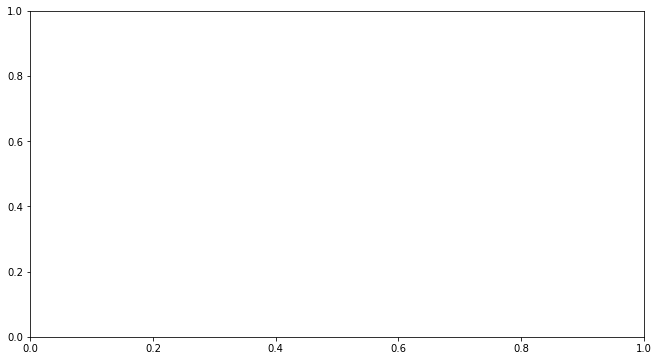

In [48]:
#Draw Predicted v/s Actual house price plot(scatter plot)
ind=[i for i in range(len(y_test))]
plt.figure(figsize=(11,6))
plt.plot(ind, y_pred, color='red', label="Predicted Prices")
plt.plot(ind,y_test, color='green',label='Actual Prices')
plt.ylabel("House Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

In [ ]:
#Predict house price for unseen data(single row)
new_values = np.array([[0.02, 0.0, 8.0, 0, 0.52, 6.0, 70.0, 3.0, 2.0, 300.0, 15.0, 390.0, 5.0]])  
lm.predict(new_values)

In [ ]:
#Predict house price for unseen data(multiple rows)
new_values = np.array([
    [0.02, 0.0, 8.0, 0, 0.52, 6.0, 70.0, 3.0, 2.0, 300.0, 15.0, 390.0, 5.0],
    [0.03, 0.1, 6.5, 0, 0.45, 5.0, 60.0, 2.5, 1.5, 250.0, 14.0, 420.0, 4.0],
    [0.01, 0.2, 7.2, 0, 0.48, 4.5, 80.0, 3.2, 2.3, 350.0, 13.0, 400.0, 5.2]
])
lm.predict(new_values)